In [1]:
import numpy as np
import math as math
import copy
import matplotlib.pyplot as plt
from sklearn import preprocessing 
import os
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import transforms, datasets
import csv
import cv2
import glob
from PIL import Image
from sklearn.model_selection import train_test_split
from scipy.integrate import quad
import sklearn
import codecs, json 
import scipy.io
import h5py

device=torch.device("cuda:0")

# Import topnet utilities
import sys
sys.path.insert(0, '/home/ephy/Projects/tda_convolution/src/')
import topnet
import importlib
importlib.reload(topnet)

<module 'topnet' from '/home/ephy/Projects/tda_convolution/src/topnet.py'>

In [2]:
colordict = {'NOL + NOL': '#1f77b4', 'KF + KOL': '#ff7f0e', 'KF + NOL': '#2ca02c',
             'CF + COL': '#d62728', 'CF + NOL': '#9467bd', 'KF + KF Pooled': '#593108',
             'NOL + NOL Pooled': '#9b9e37','KF + KF': "#7d70b5"}

In [26]:
REBUILD_DATA = False
datadir = '/home/ephy/Projects/tda_init_cnn/data/'

train = datasets.MNIST(datadir+"original/", train=True, download=False, 
                      transform= transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST(datadir+"original/", train=False, download=False, 
                      transform= transforms.Compose([transforms.ToTensor()]))

In [28]:
mnist_train_X = torch.tensor([np.array(i[0]) for i in train])
mnist_test_X = torch.tensor([np.array(i[0]) for i in test])
mnist_train_y = [i[1] for i in train]
mnist_test_y = [i[1] for i in test]

In [31]:
classes=np.unique(mnist_train_y)
mnist_test_y = torch.tensor([np.array([int(n) for n in x==classes]) for x in mnist_test_y], dtype=torch.float32)
mnist_train_y = torch.tensor([np.array([int(n) for n in x==classes]) for x in mnist_train_y], dtype=torch.float32)

In [35]:
sixes = mnist_test_X[torch.all(mnist_test_y==torch.tensor(np.eye(10)[6]),axis=1)]
nines = mnist_test_X[torch.all(mnist_test_y==torch.tensor(np.eye(10)[9]),axis=1)]

In [110]:
mnist_6and9_test_X = np.append(sixes, nines, axis=0)
mnist_6and9_test_X_flipped = torch.tensor([cv2.rotate(im,1) for im in mnist_6and9_test],dtype=torch.float32)
mnist_6and9_test_X = torch.tensor(mnist_6and9_test_X, dtype=torch.float32)

In [94]:
mnist_6and9_test_y = torch.tensor(np.repeat([np.eye(10)[6],np.eye(10)[9]],[sixes.shape[0],nines.shape[0]],axis=0))
mnist_6and9_test_y_flipped = torch.tensor(np.repeat([np.eye(10)[9],np.eye(10)[6]],[sixes.shape[0],nines.shape[0]],axis=0))

In [103]:
configs=dict()
config = dict()
config['weights_config']=[None,None]
config['freeze_layers']=[False,False]
config['membership_config']=[None,None]
config['convLayerSpecs']=[(1,64,3),(64,64,3)]
config['pools']=[None,None]
config['activations']=['F.relu', 'F.relu']
config['learning_rate']=1e-5
config['classes']=10
config['imageDim']=(28,28)
config['test_X']=mnist_6and9_test_X_flipped
config['test_y']=mnist_6and9_test_y_flipped
config['train_y']=mnist_train_y
config['train_X']=mnist_train_X
config['batchesPerTest']=20
config['batchSize']=100
config['epochs']=1
config['dataset']='SVHN'
config['loss_function']='nn.MSELoss'
config['device'] = device

configs['NOL + NOL'] = config

config = dict()
config['weights_config']=[[('Klein',8,8,3,None)],None]
config['freeze_layers']=[True,False]
config['membership_config']=[None,[('Klein',8,8,3,.65)]]
config['convLayerSpecs']=[(1,64,3),(64,64,3)]
config['pools']=[None,None]
config['activations']=[None, 'F.relu']
config['learning_rate']=1e-5
config['classes']=10
config['imageDim']=(28,28)
config['test_X']=mnist_6and9_test_X_flipped
config['test_y']=mnist_6and9_test_y_flipped
config['train_y']=mnist_train_y
config['train_X']=mnist_train_X
config['batchesPerTest']=20
config['batchSize']=100
config['epochs']=1
config['dataset']='CIFAR -> KAGGLE'
config['loss_function']='nn.MSELoss'
config['device'] = device

configs['KF + KOL'] = config

config = dict()
config['weights_config']=[[('Circle',3,64,None)],None]
config['freeze_layers']=[True,False]
config['membership_config']=[None,[('Circle',3,64,.35)]]
config['convLayerSpecs']=[(1,64,3),(64,64,3)]
config['pools']=[None,None]
config['activations']=[None, 'F.relu']
config['learning_rate']=1e-5
config['classes']=10
config['imageDim']=(28,28)
config['test_X']=mnist_6and9_test_X_flipped
config['test_y']=mnist_6and9_test_y_flipped
config['train_y']=mnist_train_y
config['train_X']=mnist_train_X
config['batchesPerTest']=20
config['batchSize']=100
config['epochs']=1
config['dataset']='CIFAR -> KAGGLE'
config['loss_function']='nn.MSELoss'
config['device'] = device

configs['CF + COL'] = config

In [104]:
# results=dict()
results['Flipped 6 vs 9'] = topnet.run_configs(configs, results['Flipped 6 vs 9'])

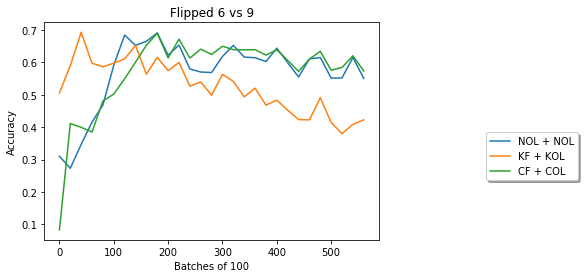

In [105]:
topnet.plot_results(results=results, dataset='Flipped 6 vs 9',item='accuracies')

In [111]:
configs=dict()
config = dict()
config['weights_config']=[None,None]
config['freeze_layers']=[False,False]
config['membership_config']=[None,None]
config['convLayerSpecs']=[(1,64,3),(64,64,3)]
config['pools']=[None,None]
config['activations']=['F.relu', 'F.relu']
config['learning_rate']=1e-5
config['classes']=10
config['imageDim']=(28,28)
config['test_X']=mnist_6and9_test_X
config['test_y']=mnist_6and9_test_y
config['train_y']=mnist_train_y
config['train_X']=mnist_train_X
config['batchesPerTest']=20
config['batchSize']=100
config['epochs']=1
config['dataset']='SVHN'
config['loss_function']='nn.MSELoss'
config['device'] = device

configs['NOL + NOL'] = config

config = dict()
config['weights_config']=[[('Klein',8,8,3,None)],None]
config['freeze_layers']=[True,False]
config['membership_config']=[None,[('Klein',8,8,3,.65)]]
config['convLayerSpecs']=[(1,64,3),(64,64,3)]
config['pools']=[None,None]
config['activations']=[None, 'F.relu']
config['learning_rate']=1e-5
config['classes']=10
config['imageDim']=(28,28)
config['test_X']=mnist_6and9_test_X
config['test_y']=mnist_6and9_test_y
config['train_y']=mnist_train_y
config['train_X']=mnist_train_X
config['batchesPerTest']=20
config['batchSize']=100
config['epochs']=1
config['dataset']='CIFAR -> KAGGLE'
config['loss_function']='nn.MSELoss'
config['device'] = device

configs['KF + KOL'] = config

config = dict()
config['weights_config']=[[('Circle',3,64,None)],None]
config['freeze_layers']=[True,False]
config['membership_config']=[None,[('Circle',3,64,.35)]]
config['convLayerSpecs']=[(1,64,3),(64,64,3)]
config['pools']=[None,None]
config['activations']=[None, 'F.relu']
config['learning_rate']=1e-5
config['classes']=10
config['imageDim']=(28,28)
config['test_X']=mnist_6and9_test_X
config['test_y']=mnist_6and9_test_y
config['train_y']=mnist_train_y
config['train_X']=mnist_train_X
config['batchesPerTest']=20
config['batchSize']=100
config['epochs']=1
config['dataset']='CIFAR -> KAGGLE'
config['loss_function']='nn.MSELoss'
config['device'] = device

configs['CF + COL'] = config

In [112]:
results['6 vs 9'] = topnet.run_configs(configs, None)

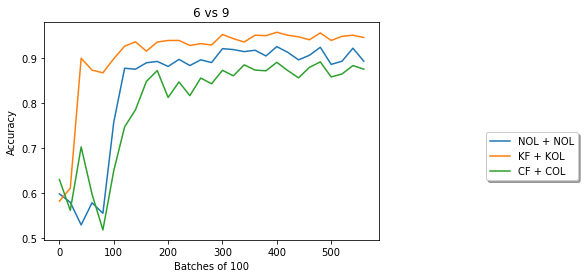

In [113]:
topnet.plot_results(results=results, dataset='6 vs 9',item='accuracies')